<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/PCA_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Diabetes.csv to Diabetes.csv


In [ ]:
import io
df=pd.read_csv(io.StringIO(uploaded['Diabetes.csv'].decode('utf-8')))

In [ ]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X=df.iloc[:,:-1].values

In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
Y=df.loc[:,'class'].values

In [ ]:
Y

array(['tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negati

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
Components = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data=Components
             ,columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df['class']], axis = 1)

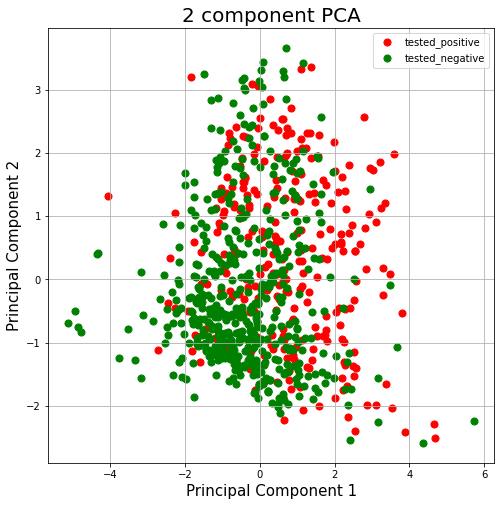

In [ ]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

classes = ['tested_positive', 'tested_negative']
colors = ['r', 'g']
for target, color in zip(classes,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()